# Modelagem à partir dos dados

Neste projeto um grafo será modelado para que a análise seja realizada através de algoritmos aplicados à essa estrutura. Portanto primeiramente este grafo será modelado com os dados exportados pelo [DataCleaning.ipynb](#https://github.com/jAzz-hub/DesmatamentoNoAmazonas/blob/main/Notebooks/DataCleaning.ipynb).

In [135]:
#Importando modulos:
from modules import *

import nx_altair as nxa

DATASETS = []

#Recriando vetor com dados tratados
for i in range(0,19):
    if i < 10: DATASETS.append(pd.read_csv(f'../Data/CleanData2000_2018/Cleaned200{i}.csv', sep=',', encoding='utf-8'))
    elif i>=10: DATASETS.append(pd.read_csv(f'../Data/CleanData2000_2018/Cleaned20{i}.csv', sep=',', encoding='utf-8'))
     

DATASETS[0].head(3)



,Lat,Long,Municipio,AreaKm2,Desmatado2000,Floresta2000,NaoObservado2000,NaoFloresta2000,Hidrografia2000,Fronteiras,MaiorQueAMédia
0,-2.83490,-57.83095,Urucurituba,2915,82.3,142.7,0.0,1689.6,1000.4,"['Boa Vista do Ramos', 'Barreirinha', 'Itapira...",False
1,-1.24938,-58.78714,Urucara,28012,299.2,26642.5,0.9,423.0,646.4,"['Nhamunda', 'Urucurituba', 'Itapiranga', 'Sao...",False
2,-3.20648,-65.43058,Uarini,10448,194.2,9721.7,0.0,100.3,431.8,"['Maraa', 'Fonte Boa', 'Jurua', 'Alvaraes', 'T...",False


### Função que cria arestas dos nós de cidades vizinhas:

A função recebe um `dataFrame` e estabelece as arestas(adjascência) entre nós(municípios) com base nas nas listas da coluna `Fronteira`.


In [136]:

dictAverageHigh = pd.Series(DATASETS[0]['MaiorQueAMédia'].values, index = DATASETS[0]['Municipio']).to_dict()

def LinkGenerator(dataFrame):
    
    Mapa = nx.Graph()
    
    for line in range(0, len(dataFrame['Municipio'])):
        neighbors = [ast.literal_eval(neighbor) for neighbor in dataFrame['Fronteiras']]
        
        
        for cityNeighbor in neighbors[line]:
            
            if not Mapa.has_edge(dataFrame['Municipio'][line], cityNeighbor) and  not Mapa.has_edge(cityNeighbor, dataFrame['Municipio'][line]):        
                Mapa.add_edge(dataFrame['Municipio'][line], cityNeighbor, edge=(dictAverageHigh[f'{cityNeighbor}'] and dictAverageHigh[f"{dataFrame['Municipio'][line]}"] ))#Fronteiras 
            
            else:
                pass
            
    return Mapa


In [137]:

#Criando Grafos para cada ano:


Graphs = []
for i in range(0, len(DATASETS)):
    Graphs.append(LinkGenerator(DATASETS[i]))
    # nx.set_node_attributes(Graphs[i], ,)

#Mostrando quantidade de nós e arestas em um grafo do ano 2000:
print(len(Graphs[0].nodes()))
print(len(Graphs[0].edges()))



62
167


In [138]:
#Criando dicionário:
#   Chave = Nome do município
#   Valor = Desmatamento acima da média

def AverageHigh(city, dataFrame):
    for index in range(0, len(dataFrame['Municipio'])):
        return dataFrame['Municipio'][index] == city and  dataFrame['MaiorQueAMédia'][index]
    
    return False   

#Ideia da função que cria grafo com arestas acima da média:    
# def LinkGreaterThanAverageGenerator(cidade, fronteiras, MapaDeRisco):
    #pega a cidade:
    #verifica se o Desmatamento está acima da média:
    #se estiver gera arestas entre ela e seuas fronteiras com desmatamento acima da média:

In [139]:
Graphs[0].edges(data = True)

EdgeDataView([('Urucurituba', 'Boa Vista do Ramos', {'edge': False}), ('Urucurituba', 'Barreirinha', {'edge': False}), ('Urucurituba', 'Itapiranga', {'edge': False}), ('Urucurituba', 'Itacoatiara', {'edge': False}), ('Urucurituba', 'Parintins', {'edge': False}), ('Urucurituba', 'Urucara', {'edge': False}), ('Urucurituba', 'Silves', {'edge': False}), ('Urucurituba', 'Nhamunda', {'edge': False}), ('Boa Vista do Ramos', 'Maues', {'edge': False}), ('Boa Vista do Ramos', 'Itacoatiara', {'edge': False}), ('Boa Vista do Ramos', 'Barreirinha', {'edge': False}), ('Barreirinha', 'Parintins', {'edge': True}), ('Barreirinha', 'Maues', {'edge': True}), ('Itapiranga', 'Urucara', {'edge': False}), ('Itapiranga', 'Silves', {'edge': False}), ('Itapiranga', 'Sao Sebastiao do Uatuma', {'edge': False}), ('Itapiranga', 'Rio Preto da Eva', {'edge': False}), ('Itapiranga', 'Presidente Figueiredo', {'edge': False}), ('Itapiranga', 'Itacoatiara', {'edge': False}), ('Itacoatiara', 'Silves', {'edge': False}), ('

# Vizualização dos dados:

Tentando uma abordagem de visualização e análise de dados com [nx_altair](#https://github.com/Zsailer/nx_altair).

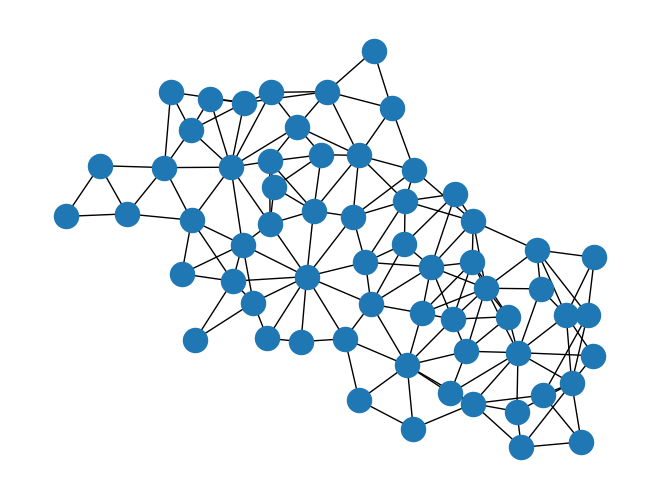

In [140]:

# nx.draw_planar(Graphs[0])
# nx.draw_shell(Graphs[0])
nx.draw_kamada_kawai(Graphs[0])



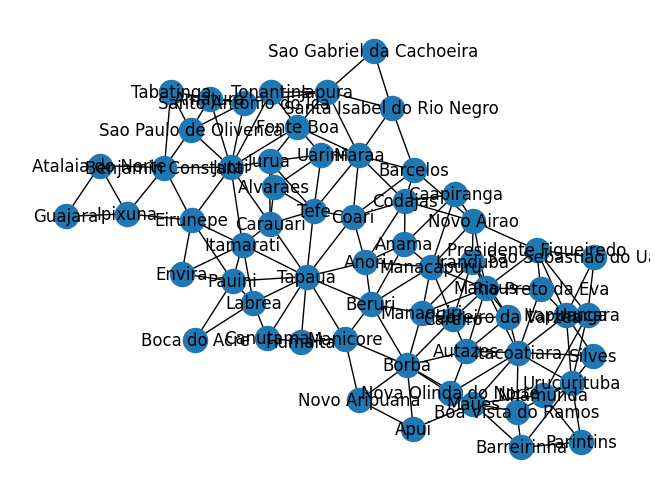

In [141]:

nx.draw_kamada_kawai(Graphs[0], with_labels = True)

# Exportando dados para GEFX
Uma tentativa de vizualização e análise serão realizadas através do Gephi.

In [142]:
for index,graph in enumerate(Graphs):
    if index < 10:    
        nx.write_gexf(graph, f"../Data/GEXF/DesmatamentoMunicipalAM_200{index}.gexf")
    else:
        nx.write_gexf(graph, f"../Data/GEXF/DesmatamentoMunicipalAM_20{index}.gexf")
        